# Final Project 2 - Logistic Reggression dan Support Vector Machine

Created-by: Kelompok 9  
Class: PYTN-KS18  
  

Member 1 : Vincent Tanaka - PYTN-KS18-013  
Member 2 : Audris Vondrea Wirduno - PYTN-KS18-02

## a. Introduction
### Brief
Project ini akan membahas mengenai pengimplentasian algoritma *supervised machine learning* yang akan digunakan pada dataset https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data.  
Dataset ini adalah dataset hujan yang terjadi selama 10 tahun di Australia. Hasil dari *supervised machine learning* nantinya adalah untuk memprediksi jika hujan di hari esok dengan menggunakan kolom *'RainTommorow'*.

### a.1 Latar Belakang
Dataset *"weatherAUS"*, yang bisa diakses melalui link https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data, merupakan kumpulan data lengkap yang diambil dari berbagai stasiun cuaca di seluruh Australia, asalnya dari paket Rattle di lingkungan R.  
Dataset ini mencakup catatan cuaca harian selama hampir satu dekade, dengan beragam variabel seperti *'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine'*, dan banyak lagi. Fitur kunci dari dataset ini adalah kolom *'RainTomorrow'*, yang berfungsi sebagai variabel target yang mengindikasikan kemungkinan hujan pada hari berikutnya (*Yes* atau *No*). Dataset ini sangat berguna untuk studi prediksi cuaca, terutama dalam hal prediksi hujan.

Fokus utama dalam menganalisis dataset ini adalah untuk menciptakan model klasifikasi menggunakan teknik *supervised machine learning*. Tujuannya adalah untuk melatih model agar dapat mengidentifikasi pola antara berbagai faktor cuaca dan terjadinya hujan keesokan harinya. Model prediktif ini akan dibangun menggunakan algoritma *logistic regression & SVM* yang diharapkan dapat menghasilkan prediksi yang akurat tentang cuaca, terutama hujan.

### a.2 About Dataset 
Dataset terdiri dari 23 atribut dengan deskripsi seperti berikut :
1. **Date** - tanggal hari itu
2. **Location** - lokasi, nama kota di Australia
3. **MinTemp** - temperatur terendah hari itu dalam celcius
4. **MaxTemp** - temperatur tertinggi hari itu dalam celcius
5. **Rainfall** - jumlah curah hujan hari itu dalam mm
6. **Evaporation** - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. **Sunshine** - jumlah jam hari itu cerah dengan cahaya matahari
8. **WindGustDir** - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. **WindGustSpeed** - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. **WindDir9am** - arah angin jam 9 pagi
11. **WindDir3pm** - arah angin jam 3 sore
12. **WindSpeed9am** - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. **WindSpeed3pm** - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. **Humidity9am** - humiditas jam 9 pagi dalam persen
15. **Humidity3pm** - humiditas jam 3 sore dalam persen
16. **Pressure9am** - tekanan udara jam 9 pagi dalam hpa
17. **Pressure3pm** - tekanan udara jam 3 sore dalam hpa
18. **Cloud9am** - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. **Cloud3pm** - persentase langit yang tertutup awan jam 3 sore
20. **Temp9am** - temperatur jam 9 pagi dalam celcius
21. **Temp3pm** - temperatur jam 3 sore dalam celcius
22. **RainToday** - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. **RainTomorrow** - variable yang mau di prediksi

### a.3 Objectives

Adapun objektif dari pengerjaan *final project - 2* ini yaitu :
* Mampu memahami konsep *Classification* dengan *Logistic Regression* dan *SVM*,
* Mampu mempersiapkan data yang bagus untuk digunakan dalam model *Logistic Regression* dan *SVM*,
* Mampu mengimplementasikan model *supervised machine learning* seperti *Logistic Regressio*n dan *SVM* untuk membuat prediksi dari kolom *'RainTommorow'*.

## b. Import Libraries

In [1]:
# Import the libraries needed for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import pickle

## c. *Data Loading/Simple Data Exploration*

In [2]:
# Specify file path
compresses_file_path = 'dataset.zip'
# Import the dataset
df = pd.read_csv(compresses_file_path, compression='zip')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.shape

(145460, 23)

Dari hasil eksplorasi sederhana ini, *dataframe rain in Australia *memiliki kolom sebanyak 23 dan baris sebanyak 145460. Tipe data dari *dataframe* ini didominasi oleh *float64* dan *object*. Di tahap selanjutnya akan dilanjutkan dengan melakukan simple *data* *cleaning* pada *dataset* ini.

## d. *Data Cleaning*

### d.1 Check Duplicated Value

Pada tahap ini dataset akan dicek jika memiliki baris data duplikat.

In [6]:
df.duplicated().sum()

0

Disimpulkan bahwa dataset tidak memiliki *duplicate value*.

### d.2 *Check Missing Value*
Disini dataset akan dicek jika memiliki nilai kosong pada tiap kolomnya.

In [7]:
# Missing Value count for each column
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

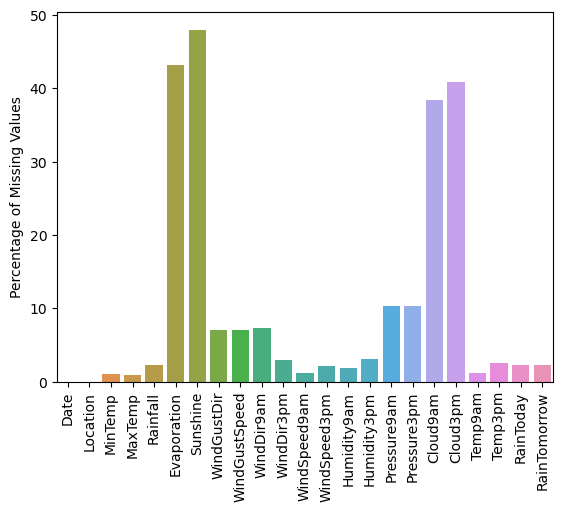

In [8]:
# Check the percentage of missing values for each column
missing_percentage = df.isna().sum() / len(df) * 100
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90) 
plt.ylabel('Percentage of Missing Values')
plt.show()


Dari hasil visualisasi ini bisa dinyatakan bahwa hanya data 'Date' dan 'Location' saja yang tidak memiliki nilai kosong. Sedangkan kolom *'Evaporation','sunshine','Cloud9am*', dan *'Cloud3pm'* memiliki data bernilai kosong yang mencapai >35-40% dari panjang data. Kesimpulan yang didapat dari hasil ini adalah untuk kolom *'Evaporation','sunshine','Cloud9am*', dan *'Cloud3pm'* dibuang dikarenakan jumlah *missing values* yang terlalu banyak sehingga jika diisi lagi data tersebut akan terasa *Bias*. Lalu untuk baris data yang ada di *'RainTommorow'* yang memiliki *missing value* juga akan dibuang dikarenakan data akan Bias jika dilabel ulang.

In [9]:
# Threshold for dropping extreme missing value columns
threshold = 35  # 35%
for column in df.columns:
    if (df[column].isna().sum() / len(df) * 100) > threshold:
        df.drop(column, axis=1, inplace=True)

# Drop rows where 'RainTomorrow' is missing
df = df.dropna(subset=['RainTomorrow'])

In [10]:
df.isna().sum() / len(df) * 100

Date             0.000000
Location         0.000000
MinTemp          0.447983
MaxTemp          0.226453
Rainfall         0.988797
WindGustDir      6.561504
WindGustSpeed    6.519308
WindDir9am       7.041838
WindDir3pm       2.656952
WindSpeed9am     0.948007
WindSpeed3pm     1.849599
Humidity9am      1.247600
Humidity3pm      2.538803
Pressure9am      9.855619
Pressure3pm      9.832411
Temp9am          0.635756
Temp3pm          1.917113
RainToday        0.988797
RainTomorrow     0.000000
dtype: float64

Proses akan dilanjut dengan mengisi data kosong / *missing value* dengan syarat berikut:
- Data kategorikal akan diisi menggunakan nilai modus yang ada di tiap kolomnya
- Data numerical akan diisi menggunakan nilai mean yang ada di tiap kolomnya

In [11]:
categorical_df = df.select_dtypes('object').columns
categorical_df

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

Disini kolom data dari *'categorical_df'* akan diisi menggnkan nilai modusnya. Kolom *'date', 'location'* dan *'RainTommorow'* akan diabaikan dikarenakan data *NaN* sudah kosong.

In [12]:
# List of columns to fill NaN values
fill_na = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Fill NaN values with mode for each columns from fill_na
for column in fill_na:
    mode_value = df[column].mode()[0] 
    df[column].fillna(mode_value, inplace=True)

# Verify that NaN values have been filled
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir          0
WindGustSpeed     9270
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday            0
RainTomorrow         0
dtype: int64

Proses akan dilanjut dengan mengisi *missing value* pada kolom *numeric* menggunakan *mean*.

In [13]:
numerical_df = df.select_dtypes('float64').columns
numerical_df  

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [14]:
fill_na_numeric = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm']

# Fill NaN values with mean for each columns from fill_na
for column in fill_na_numeric:
    mean_value = df[column].mean()  # Calculate the mode
    df[column].fillna(mean_value, inplace=True)

# Verify that NaN values have been filled
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Setelah *data cleaning* dilakukan pada dataset, proses bisa dilanjut dengan melakukan visualisasi data pada *dataset*. Sebelum proses dilanjut untuk divisualisasi, akan ada modifikasi yang dilakukan pada kolom *'Date'* terlebih dahulu dikarenakan kolom *'Date'* memiliki variasi yang terlalu banyak.

## e. *EDA/Data Exploration*

### *e.1 Simple Data Grouping for Visualization*

Pertama-tama kolom di *dataframe* *'Date'* akan digunakan untuk visualisasi data. Dikarenakan *format* sekarang masih dalam bentuk *'object'* maka *format data* akan diubah telebih dahulu. 

In [15]:
# Change 'Date' to datetime data type
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01 00:00:00+00:00,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02 00:00:00+00:00,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03 00:00:00+00:00,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04 00:00:00+00:00,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05 00:00:00+00:00,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Setelah mengubah *data type*, proses dilanjut dengan membuat 3 kolom baru dari kolom *'Date'*. Kolom 

In [16]:
## Make 3 new columns: year, month, and day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

Selelah ketiga kolom ini dibuat, kolom *'Date'* bisa dibuang diakrenakan ketiga kolom ini sudah mewakilkan data yang ada dari kolom *'Date'.*

In [17]:
# Drop 'Date' column
df.drop('Date', axis=1, inplace=True)

### e.2 *Measuring Central of Tendency*

In [18]:
# Calculate the Central Tendency of each numerical columns
central_tendency = df.describe().T
central_tendency.reset_index().rename(
    columns={'index': 'Attributes'})

,Attributes,count,mean,std,min,25%,50%,75%,max
0,MinTemp,142193.0,12.186400,6.388924,-8.5,7.6,12.000000,16.8,33.9
1,MaxTemp,142193.0,23.226784,7.109554,-4.8,17.9,22.700000,28.2,48.1
2,Rainfall,142193.0,2.349974,8.423217,0.0,0.0,0.000000,0.8,371.0
3,WindGustSpeed,142193.0,39.984292,13.138385,6.0,31.0,39.000000,46.0,135.0
4,WindSpeed9am,142193.0,14.001988,8.851082,0.0,7.0,13.000000,19.0,130.0
5,WindSpeed3pm,142193.0,18.637576,8.721551,0.0,13.0,18.637576,24.0,87.0
6,Humidity9am,142193.0,68.843810,18.932077,0.0,57.0,70.000000,83.0,100.0
7,Humidity3pm,142193.0,51.482606,20.532065,0.0,37.0,51.482606,65.0,100.0
8,Pressure9am,142193.0,1017.653758,6.746248,980.5,1013.5,1017.653758,1021.8,1041.0
9,Pressure3pm,142193.0,1015.258204,6.681788,977.1,1011.0,1015.258204,1019.4,1039.6


### e.3 *Measure Variebility of Data*

## f. *Data Preprocessing*

### f.1 Encoding

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  object 
 17  RainTomorrow   142193 non-nul

In [20]:
# Use Label Encoder do Encode data
la = LabelEncoder()
encode_column = []
for column in df.columns:
    if df[column].dtype == 'object':
        encode_column.append(column)
encode_column

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [21]:
for column in encode_column:
    print(column)
    df[column] = la.fit_transform(df[column])

Location
WindGustDir
WindDir9am
WindDir3pm
RainToday
RainTomorrow


### f.2 Correlation Check

<Axes: >

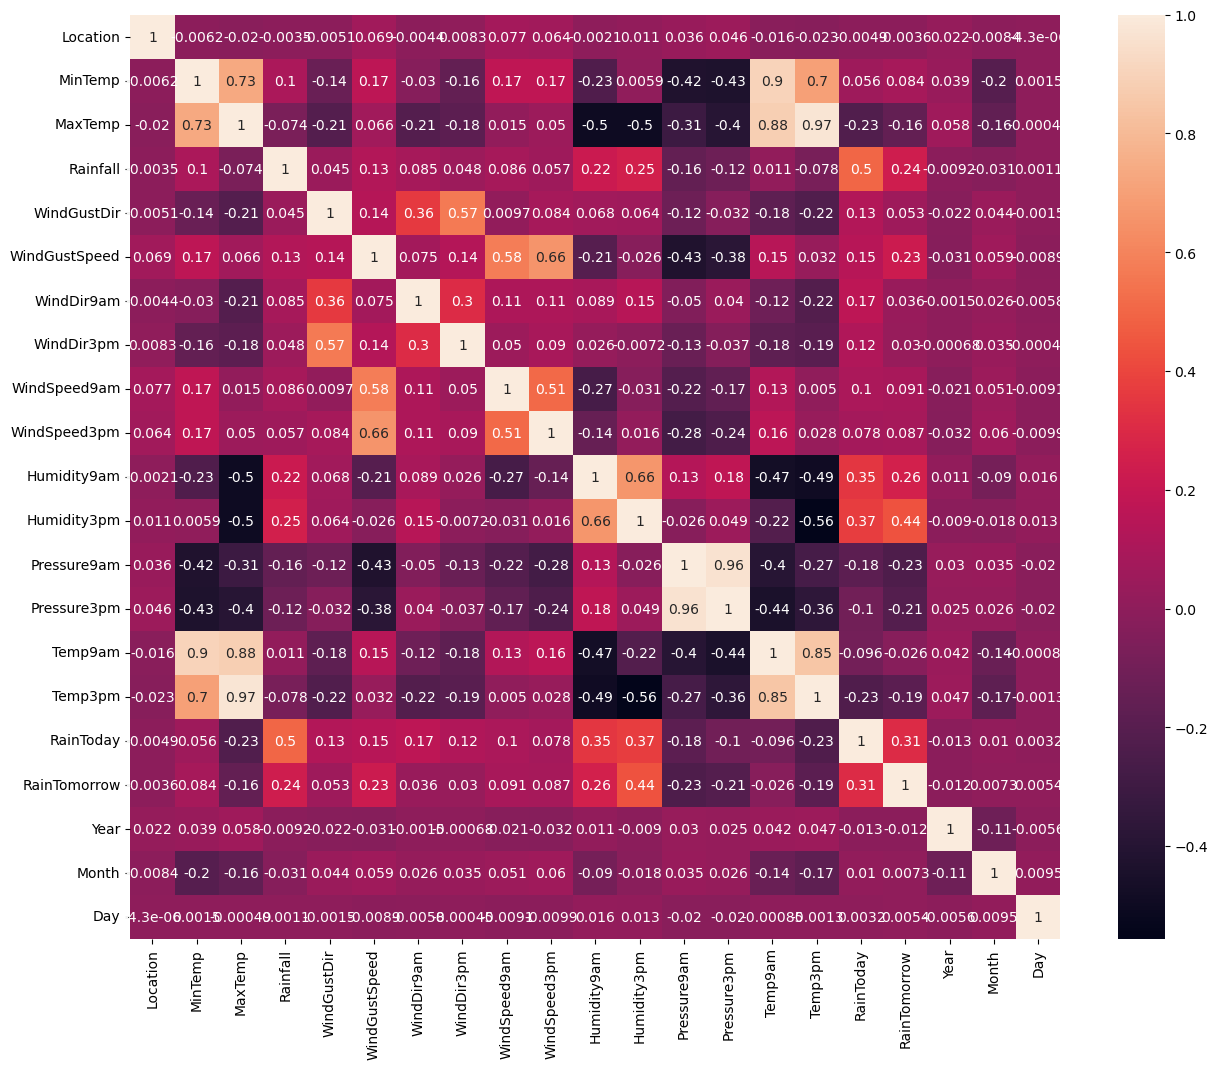

In [22]:
correlation_check = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation_check, annot=True)

### f.3 *Split Train Test Data* 

Disini proses dilanjut dengan membagi *rows*/baris yang ada di *dataset* menjadi 2 jenis yaitu *data train* dan *data test*. Disini bobot dari pembagian tersebut adalah 80:20. Proses bisa dimulai dengan menentukan variabel fitur dan target menjadi variabel X dan y.

#### f.3.1 Declare X and y

In [23]:
# Declare the column that want to be a feature and a target
X = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

#### f.3.2 *Check labeled data counts*

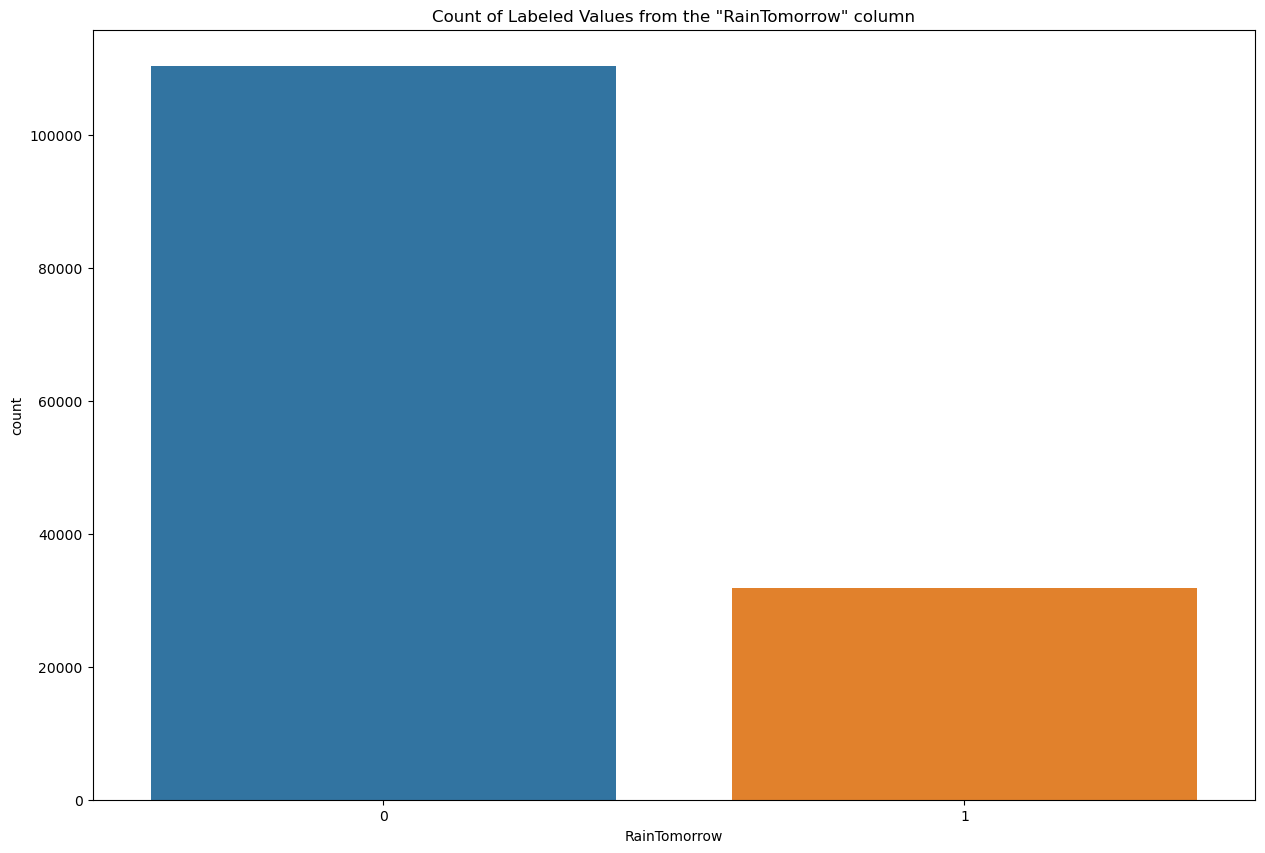

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['RainTomorrow'])
plt.title('Count of Labeled Values from the "RainTomorrow" column')
plt.show()

Dari hasil pengecekan plot kolom *'RainTomorrow*', data disini termasuk *imbalanced*. Dimana jumlah data yang terlabel '0'/tidak hujan jauh lebih banyak daripada data yang terlabel '1'/hujan. Jika data langsung digunakan, akan menyebabkan hasil yang kurang baik dalam memprediksi data yang labelnya sedikit. Disini metode yang akan digunakan untuk mencegah *data imbalanced* ini adalah dengan menggunakan *SMOTE(Synthetic Minority Over-Sampling Technique)*.

In [25]:
X, y = SMOTE().fit_resample(X, y)

In [26]:
y.value_counts()

0    110316
1    110316
Name: RainTomorrow, dtype: int64

#### f.3.3 *Split Data*

In [27]:
# Split the train test data into 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## g. *Define the model*

In [28]:
# Define both models for classification
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC(kernel='linear')

## h. *Model training*

In [29]:
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
svm_model.fit(X_train, y_train)

## g. *Model Evaluation*

In [ ]:
lr_predictions = lr_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

In [ ]:
# Evaluate the logistic regression model
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Model Accuracy: {lr_accuracy}")
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Model Accuracy: {svm_accuracy}")
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))